/Users/maryamsoftdev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


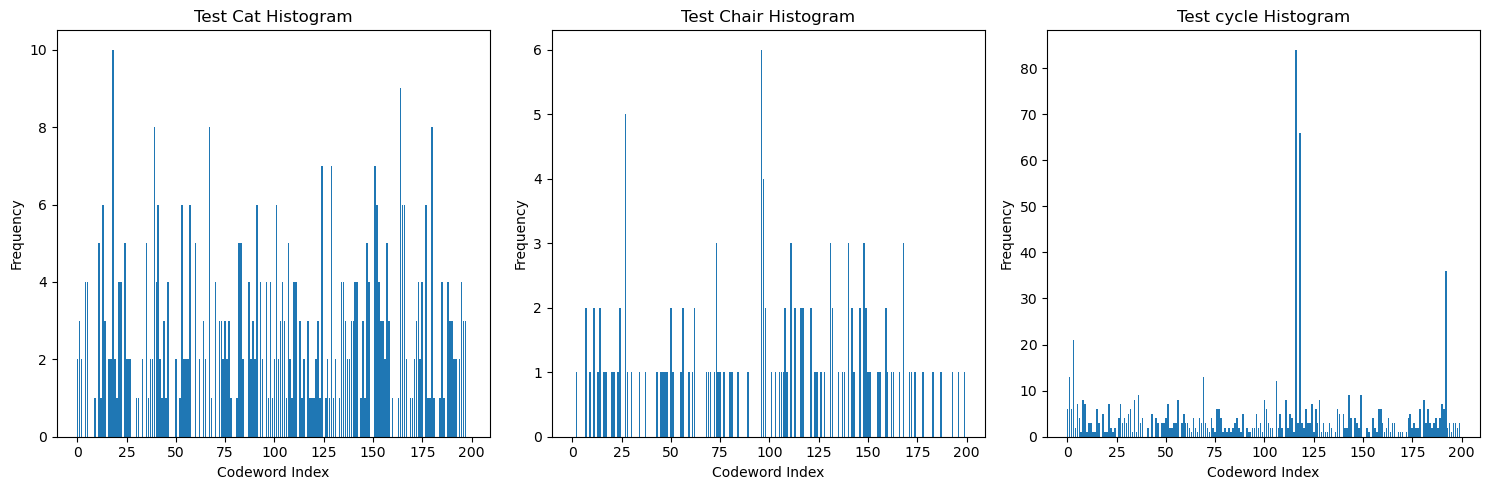

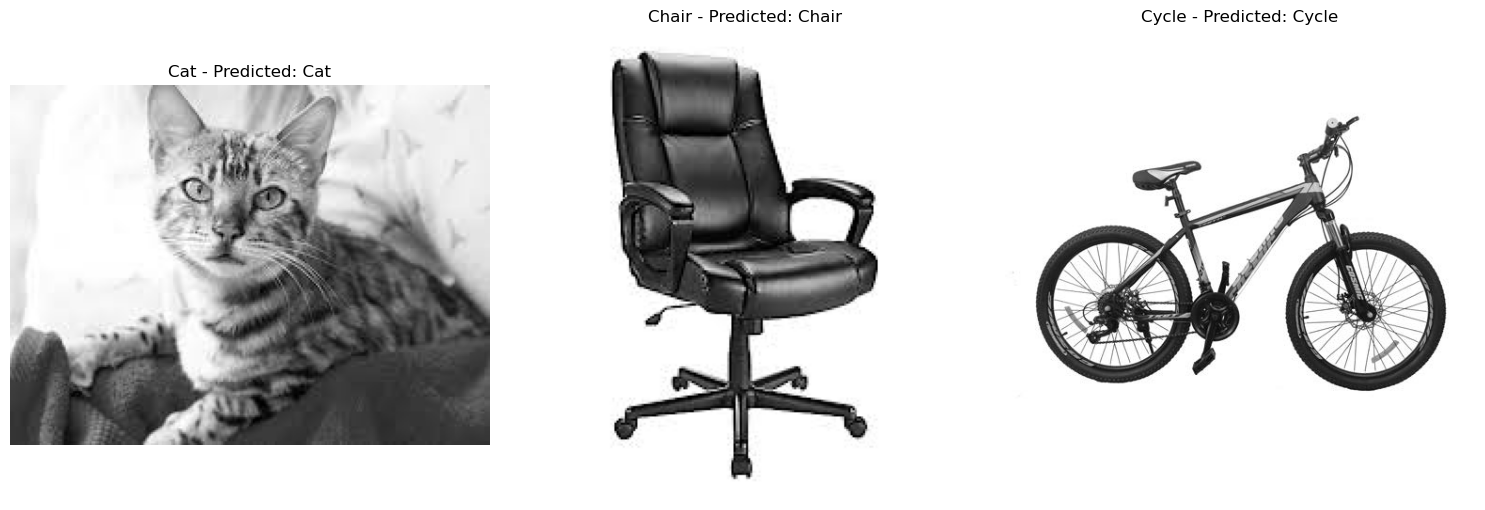

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load images
cat_images = [cv2.imread(f'bovwData/cat{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1, 12)]
chair_images = [cv2.imread(f'bovwData/chair{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1, 12)]
cycle_images = [cv2.imread(f'bovwData/cycle{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1, 12)]

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features from training images
def extract_sift_features(images):
    descriptors = []
    for img in images:
        _, des = sift.detectAndCompute(img, None)
        if des is not None:
            descriptors.extend(des)
    return np.array(descriptors)

# Combine descriptors for clustering
all_cat_descriptors = extract_sift_features(cat_images[:10])
all_chair_descriptors = extract_sift_features(chair_images[:10])
all_cycle_descriptors = extract_sift_features(cycle_images[:10])
all_descriptors = np.vstack((all_cat_descriptors, all_chair_descriptors, all_cycle_descriptors))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=200)  # Set the number of clusters
kmeans.fit(all_descriptors)
codewords = kmeans.cluster_centers_

# Compute histograms for images
def compute_histograms(images, codewords):
    histograms = []
    for img in images:
        _, des = sift.detectAndCompute(img, None)
        if des is not None:
            hist = np.zeros(len(codewords))
            labels = kmeans.predict(des)
            for label in labels:
                hist[label] += 1
            histograms.append(hist)
    return np.array(histograms)

# Compute histograms for training images
cat_hist_train = compute_histograms(cat_images[:10], codewords)
chair_hist_train = compute_histograms(chair_images[:10], codewords)
cycle_hist_train = compute_histograms(cycle_images[:10], codewords)

# Create training labels
cat_labels = np.zeros(len(cat_hist_train))
chair_labels = np.ones(len(chair_hist_train))
cycle_labels = 2 * np.ones(len(cycle_hist_train))

# Combine training data and labels
X_train = np.vstack((cat_hist_train, chair_hist_train, cycle_hist_train))
y_train = np.hstack((cat_labels, chair_labels, cycle_labels))

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors
knn.fit(X_train, y_train)

# Compute histograms for test images
cat_hist_test = compute_histograms([cat_images[10]], codewords)
chair_hist_test = compute_histograms([chair_images[10]], codewords)
cycle_hist_test = compute_histograms([cycle_images[10]], codewords)

# Plot test cat and test chair histograms in subplots
plt.figure(figsize=(15, 5))

# Plot test cat histogram
plt.subplot(1, 3, 1)
plt.bar(range(len(cat_hist_test[0])), cat_hist_test[0])
plt.title('Test Cat Histogram')
plt.xlabel('Codeword Index')
plt.ylabel('Frequency')

# Plot test chair histogram
plt.subplot(1, 3, 2)
plt.bar(range(len(chair_hist_test[0])), chair_hist_test[0])
plt.title('Test Chair Histogram')
plt.xlabel('Codeword Index')
plt.ylabel('Frequency')


# Plot test chair histogram
plt.subplot(1, 3, 3)
plt.bar(range(len(cycle_hist_test[0])), cycle_hist_test[0])
plt.title('Test cycle Histogram')
plt.xlabel('Codeword Index')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




# Create test labels
cat_labels_test = np.zeros(len(cat_hist_test))
chair_labels_test = np.ones(len(chair_hist_test))
cycle_labels_test = 2 * np.ones(len(cycle_hist_test))

# Combine test data and labels
X_test = np.vstack((cat_hist_test, chair_hist_test, cycle_hist_test))
y_test = np.hstack((cat_labels_test, chair_labels_test, cycle_labels_test))

# Predict using KNN classifier
y_pred = knn.predict(X_test)

# Display classification results
plt.figure(figsize=(15, 5))

# Plot Cat image and prediction
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cat_images[10], cv2.COLOR_BGR2RGB))
plt.title(f'Cat - Predicted: {"Cat" if y_pred[0] == 0 else "Chair" if y_pred[0] == 1 else "Cycle"}')
plt.axis('off')

# Plot Chair image and prediction
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(chair_images[10], cv2.COLOR_BGR2RGB))
plt.title(f'Chair - Predicted: {"Cat" if y_pred[1] == 0 else "Chair" if y_pred[1] == 1 else "Cycle"}')
plt.axis('off')

# Plot Cycle image and prediction
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cycle_images[10], cv2.COLOR_BGR2RGB))
plt.title(f'Cycle - Predicted: {"Cat" if y_pred[2] == 0 else "Chair" if y_pred[2] == 1 else "Cycle"}')
plt.axis('off')

plt.tight_layout()
plt.show()


/Users/maryamsoftdev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


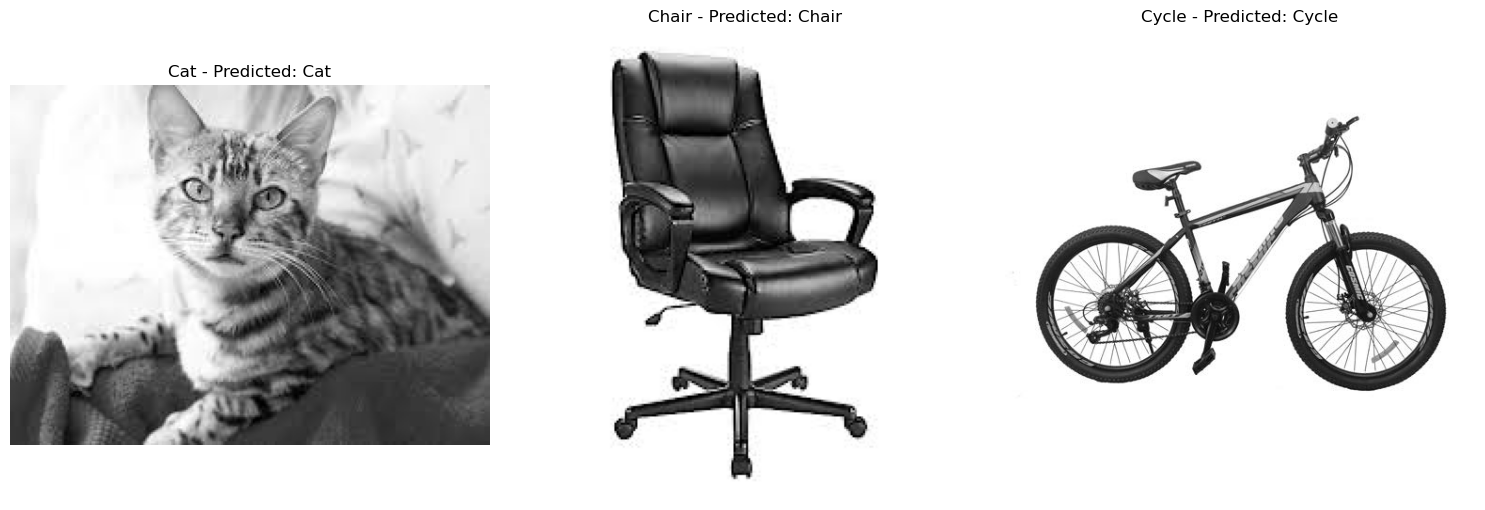

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load images
cat_images = [cv2.imread(f'bovwData/cat{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1, 12)]
chair_images = [cv2.imread(f'bovwData/chair{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1, 12)]
cycle_images = [cv2.imread(f'bovwData/cycle{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1, 12)]

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features from training images
def extract_sift_features(images):
    descriptors = []
    for img in images:
        _, des = sift.detectAndCompute(img, None)
        if des is not None:
            descriptors.extend(des)
    return np.array(descriptors)

# Combine descriptors for clustering
all_cat_descriptors = extract_sift_features(cat_images[:10])
all_chair_descriptors = extract_sift_features(chair_images[:10])
all_cycle_descriptors = extract_sift_features(cycle_images[:10])
all_descriptors = np.vstack((all_cat_descriptors, all_chair_descriptors, all_cycle_descriptors))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=200)  # Set the number of clusters
kmeans.fit(all_descriptors)
codewords = kmeans.cluster_centers_

# Compute histograms for images
def compute_histograms(images, codewords):
    histograms = []
    for img in images:
        _, des = sift.detectAndCompute(img, None)
        if des is not None:
            hist = np.zeros(len(codewords))
            labels = kmeans.predict(des)
            for label in labels:
                hist[label] += 1
            histograms.append(hist)
    return np.array(histograms)

# Compute histograms for training images
cat_hist_train = compute_histograms(cat_images[:10], codewords)
chair_hist_train = compute_histograms(chair_images[:10], codewords)
cycle_hist_train = compute_histograms(cycle_images[:10], codewords)

# Create training labels
cat_labels = np.zeros(len(cat_hist_train))
chair_labels = np.ones(len(chair_hist_train))
cycle_labels = 2 * np.ones(len(cycle_hist_train))

# Combine training data and labels
X_train = np.vstack((cat_hist_train, chair_hist_train, cycle_hist_train))
y_train = np.hstack((cat_labels, chair_labels, cycle_labels))

# Train SVM classifier
svm = SVC(kernel='linear')  # Set the kernel type
svm.fit(X_train, y_train)

# Compute histograms for test images
cat_hist_test = compute_histograms([cat_images[10]], codewords)
chair_hist_test = compute_histograms([chair_images[10]], codewords)
cycle_hist_test = compute_histograms([cycle_images[10]], codewords)

# Create test labels
cat_labels_test = np.zeros(len(cat_hist_test))
chair_labels_test = np.ones(len(chair_hist_test))
cycle_labels_test = 2 * np.ones(len(cycle_hist_test))

# Combine test data and labels
X_test = np.vstack((cat_hist_test, chair_hist_test, cycle_hist_test))
y_test = np.hstack((cat_labels_test, chair_labels_test, cycle_labels_test))

# Predict using SVM classifier
y_pred = svm.predict(X_test)

# Display classification results
plt.figure(figsize=(15, 5))

# Plot Cat image and prediction
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cat_images[10], cv2.COLOR_BGR2RGB))
plt.title(f'Cat - Predicted: {"Cat" if y_pred[0] == 0 else "Chair" if y_pred[0] == 1 else "Cycle"}')
plt.axis('off')

# Plot Chair image and prediction
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(chair_images[10], cv2.COLOR_BGR2RGB))
plt.title(f'Chair - Predicted: {"Cat" if y_pred[1] == 0 else "Chair" if y_pred[1] == 1 else "Cycle"}')
plt.axis('off')

# Plot Cycle image and prediction
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cycle_images[10], cv2.COLOR_BGR2RGB))
plt.title(f'Cycle - Predicted: {"Cat" if y_pred[2] == 0 else "Chair" if y_pred[2] == 1 else "Cycle"}')
plt.axis('off')

plt.tight_layout()
plt.show()
